<a href="https://colab.research.google.com/github/lcbjrrr/algojust/blob/main/NB03_statsMiss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

.

- **Statistical Misinterpretation**: Misinterpreting results happens when conclusions don’t align with proper statistical analysis, leading to misleading findings. Common issues include assuming correlation means causation, cherry-picking data, or ignoring confounding factors. This can distort research outcomes and impact decision-making. Want to refine it further?


*The data used herein is for illustrative purposes only and does not reflect actual real-world data*

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/algojust/refs/heads/main/Covid%20-%20Cytokine.csv')
df.head(2)

,PREmRNA,POSTmRNA,PlacebomRNA,PREVector,POSTVector,PlaceboVector,PREProtein,POSTProtein,PlaceboProtein,PREInactivated,POSTInactivated,PlaceboInactivated,PreDNA,PostDNA,PlaceboDNA
0,40,660,0,40,330.0,0,40,220,0,22,88,0,5,11,0
1,40,150,1,40,75.0,1,40,50,1,33,99,1,11,11,1


#### Are any of the vaccines effective? Let's take the DNA based one as an initial exemple...

14.25 19.125


<BarContainer object of 2 artists>

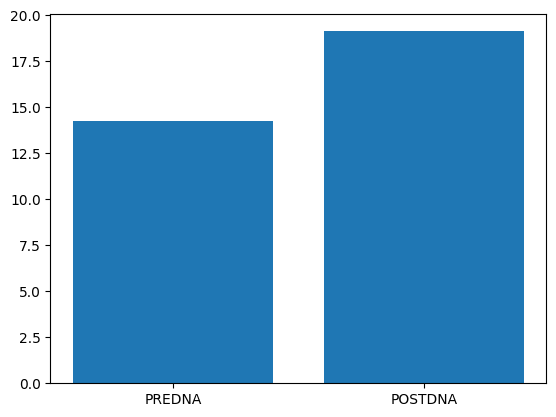

In [12]:
df_non_placebo = df[df['PlaceboDNA'] == 0].copy()
avg_prem = df_non_placebo['PreDNA'].mean()
avg_postm = df_non_placebo['PostDNA'].mean()
sem_prem = df_non_placebo['PreDNA'].sem()
sem_postm = df_non_placebo['PostDNA'].sem()
print(avg_prem,avg_postm)
plt.bar(['PREDNA', 'POSTDNA'], [avg_prem, avg_postm] )

#### How sure are you?

11.279858806440775 17.220141193559225 16.407106039477412 21.842893960522588


<BarContainer object of 2 artists>

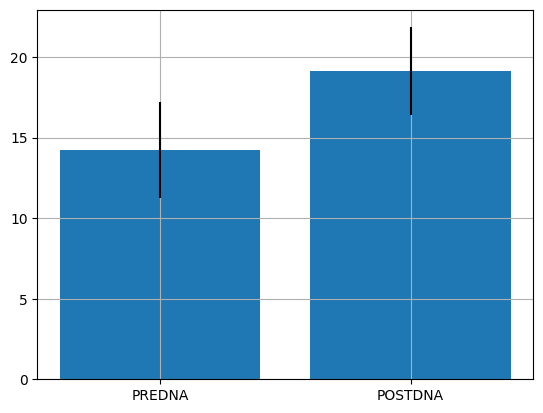

In [4]:
df_non_placebo = df[df['PlaceboDNA'] == 0].copy()
avg_prem = df_non_placebo['PreDNA'].mean()
avg_postm = df_non_placebo['PostDNA'].mean()
sem_prem = df_non_placebo['PreDNA'].sem()
sem_postm = df_non_placebo['PostDNA'].sem()
print(avg_prem-sem_prem*1.96,avg_prem+sem_prem*1.96,avg_postm-sem_postm*1.96,avg_postm+sem_postm*1.96)
plt.grid(True)
plt.bar(['PREDNA', 'POSTDNA'], [avg_prem, avg_postm], yerr=[sem_prem*1.96,sem_postm*1.96])

#### Let's take another vaccine then, how about Inactivated virus based one?

<BarContainer object of 2 artists>

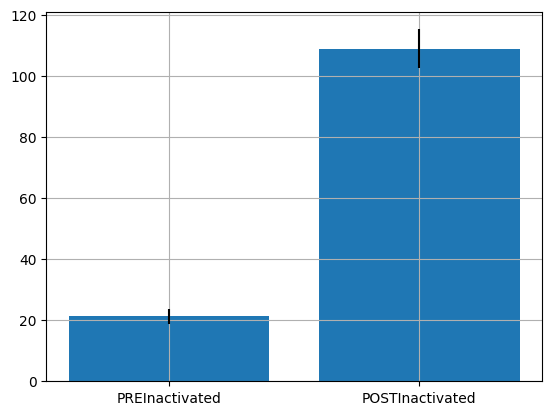

In [8]:
df_non_placebo = df[df['PlaceboInactivated'] == 0].copy()
avg_prem = df_non_placebo['PREInactivated'].mean()
avg_postm = df_non_placebo['POSTInactivated'].mean()
sem_prem = df_non_placebo['PREInactivated'].sem()
sem_postm = df_non_placebo['POSTInactivated'].sem()
plt.grid(True)
plt.bar(['PREInactivated', 'POSTInactivated'], [avg_prem, avg_postm], yerr=[sem_prem*1.96,sem_postm*1.96])

#### Make sure to compare your results um a control group, for intance, people that took placebo.

102.69047315305988 115.30952684694012 95.90021659266698 103.09978340733302


<BarContainer object of 2 artists>

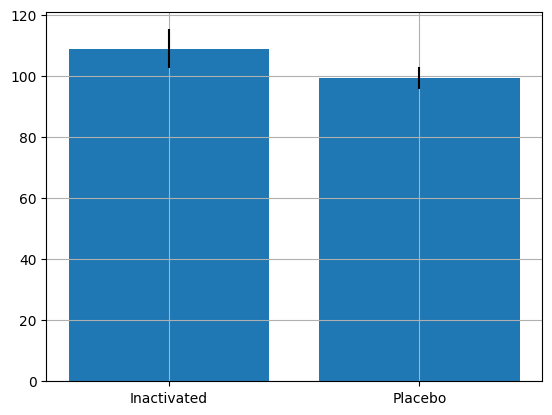

In [9]:
df_placebo = df[df['PlaceboInactivated'] == 1].copy()
avg_placebo = df_placebo['POSTInactivated'].mean()
sem_placebo = df_placebo['POSTInactivated'].sem()
plt.grid(True)
print(avg_postm-sem_postm*1.96,avg_postm+sem_postm*1.96, avg_placebo-sem_placebo*1.96,avg_placebo+sem_placebo*1.96)
plt.bar(['Inactivated', 'Placebo'],[avg_postm,avg_placebo], yerr=[sem_postm*1.96, sem_placebo*1.96])

#### Let's check on the RNA based one:

<BarContainer object of 2 artists>

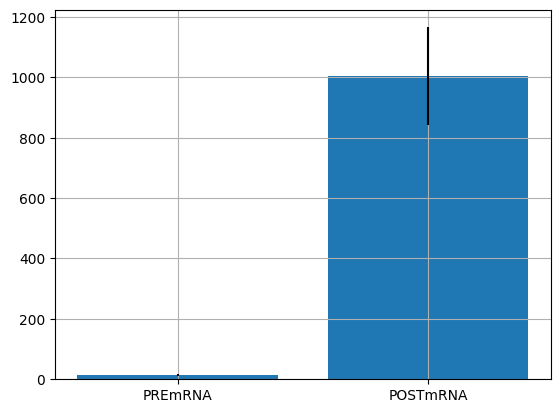

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.grid(True)
df_non_placebo = df[df['PlacebomRNA'] == 0].copy()
avg_prem = df_non_placebo['PREmRNA'].mean()
avg_postm = df_non_placebo['POSTmRNA'].mean()
sem_prem = df_non_placebo['PREmRNA'].sem()
sem_postm = df_non_placebo['POSTmRNA'].sem()
plt.bar(['PREmRNA', 'POSTmRNA'], [avg_prem, avg_postm], yerr=[sem_prem*1.96,sem_postm*1.96])

<BarContainer object of 2 artists>

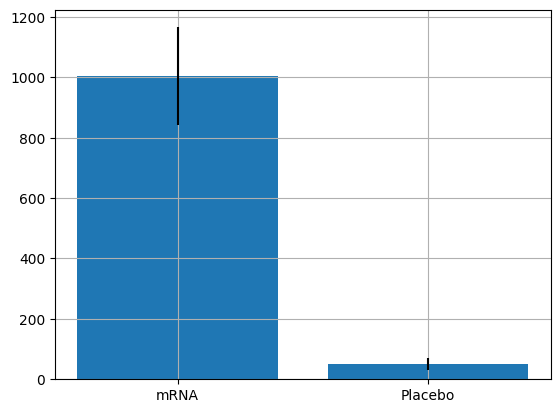

In [11]:
df_placebo = df[df['PlacebomRNA'] == 1].copy()
avg_placebo = df_placebo['POSTmRNA'].mean()
sem_placebo = df_placebo['POSTmRNA'].sem()
plt.grid(True)
plt.bar(['mRNA', 'Placebo'],[avg_postm,avg_placebo], yerr=[sem_postm*1.96, sem_placebo*1.96])

#### Are any of the vaccines "more efficient" than the others? Meaning, is there a statistically significant relationship between two categorical variables by comparing observed frequencies to expected frequencies?

# Chi-Squared test

The **Chi-Squared test** (often written as χ2 test) is a statistical hypothesis test that is widely used in the analysis of categorical data. It helps determine if there is a significant association between two categorical variables or if the observed frequency distribution of a single categorical variable differs from an expected frequency distribution.

|          | Immune | Not |
|----------|------|------|
| mRNA | 25   | 5    |
| DNA  | 5    | 10   |



In [ ]:
import numpy as np
from scipy.stats import chisquare
data = np.array([[25, 5],
                 [5, 10]])
mRNA = data[0,:].sum()
DNA = data[1,:].sum()
immune = data[:,0].sum()
not_immune = data[:,1].sum()
total = data.sum()
print(mRNA,DNA,immune,not_immune,total)


30 15 30 15 45



|          | Immune | Not | Total |
|----------|------|------|-------|
| mRNA | 25   | 5    | **30**    |
| DNA  | 5    | 10   | **15**    |
| **Total**    | **30**   | **15**   | **45**    |



$$T \times P(mRNA) \times P(imu) = total \times \left( \frac{mRNA}{total} \right) \left( \frac{immune}{total}\right).
$$



|          | **.................Immune.................** | **.............Not Immune.............** |
|----------|------|------|
| **mRNA** | $T \times P(mRNA) \times P(imu)$    | $T \times P(mRNA) \times  P(not)$    |
| **DNA**  | $T \times P(DNA) \times P(imu)$    | $T \times P(DNA) \times P(not)$     |

In [ ]:
expected = np.array([[total*(mRNA/total)*(immune/total), total*(mRNA/total)*(not_immune/total)],
                   [total*(DNA/total)*(immune/total), total*(DNA/total)*(not_immune/total)]])
print(expected)
stat, p_value = chisquare(data.flatten(), f_exp=expected.flatten())

alpha = 0.05
print(stat)
print(p_value)

#Conclusion: Highly Significant Association: The p-value (~0.0008) is much less than 0.05, indicating a very strong statistical association between...

[[20. 10.]
 [10.  5.]]
11.25
0.010448064558680668
